# Simple Linear Classification Example

This example uses the breast cancer data from Sklearn to train a simple binary classifier to predict whether the sample contains cancer.

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # Reduce TF verbosity
import tensorflow as tf
tf.get_logger().setLevel('INFO') # Reduce TF verbosity
print(f"tensorflow version: {tf.__version__}")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

tensorflow version: 2.6.0


In [2]:
#Load the breast cancer data
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# Check type of data and print the keys
print(f"Type of data: {type(data)}")
print(f"Keys: {data.keys()}")
print(f"Shape of the data: {data.data.shape}")
print(f"Shape of the target: {data.target.shape}")
print(f"Feature names: {data.feature_names}")
print(f"Target names: {data.target_names}")

Type of data: <class 'sklearn.utils.Bunch'>
Keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Shape of the data: (569, 30)
Shape of the target: (569,)
Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target names: ['malignant' 'benign']


In [3]:
# Split input features and target into train- and test sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [4]:
# Create the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 31        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

# Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 1s 13ms/step - loss: 0.6931 - accuracy: 0.5564 - val_loss: 0.6194 - val_accuracy: 0.6436
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6159 - accuracy: 0.6457 - val_loss: 0.5522 - val_accuracy: 0.7287
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5475 - accuracy: 0.7297 - val_loss: 0.4959 - val_accuracy: 0.7606
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4912 - accuracy: 0.7927 - val_loss: 0.4486 - val_accuracy: 0.8191
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.4439 - accuracy: 0.8714 - val_loss: 0.4095 - val_accuracy: 0.8723
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4047 - accuracy: 0.8845 - val_loss: 0.3775 - val_accuracy: 0.9043
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.3728 - accuracy: 0.9134 - val_loss: 0.3506 - val_accuracy: 0.9255
Epoch 8/100


Epoch 59/100
12/12 [==============================] - 0s 5ms/step - loss: 0.1227 - accuracy: 0.9738 - val_loss: 0.1280 - val_accuracy: 0.9574
Epoch 60/100
12/12 [==============================] - 0s 5ms/step - loss: 0.1218 - accuracy: 0.9738 - val_loss: 0.1271 - val_accuracy: 0.9574
Epoch 61/100
12/12 [==============================] - 0s 4ms/step - loss: 0.1208 - accuracy: 0.9738 - val_loss: 0.1262 - val_accuracy: 0.9574
Epoch 62/100
12/12 [==============================] - 0s 4ms/step - loss: 0.1200 - accuracy: 0.9738 - val_loss: 0.1254 - val_accuracy: 0.9574
Epoch 63/100
12/12 [==============================] - 0s 5ms/step - loss: 0.1191 - accuracy: 0.9738 - val_loss: 0.1246 - val_accuracy: 0.9574
Epoch 64/100
12/12 [==============================] - 0s 5ms/step - loss: 0.1183 - accuracy: 0.9738 - val_loss: 0.1238 - val_accuracy: 0.9574
Epoch 65/100
12/12 [==============================] - 0s 5ms/step - loss: 0.1174 - accuracy: 0.9764 - val_loss: 0.1230 - val_accuracy: 0.9574
Epoch 

In [6]:
# Evaluate the model
print(f"Train score: {model.evaluate(X_train, y_train)}")
print(f"Test score: {model.evaluate(X_test, y_test)}")

12/12 [==============================] - 0s 2ms/step - loss: 0.0973 - accuracy: 0.9764
Train score: [0.0972985103726387, 0.9763779640197754]
6/6 [==============================] - 0s 2ms/step - loss: 0.1050 - accuracy: 0.9521
Test score: [0.10498710721731186, 0.9521276354789734]


In [7]:
# Model weights
for layer in model.layers:
    print(f"Layer weights: {layer.weights}")
    print(f"Layer bias: {layer.bias}")
    print("---")

Layer weights: [<tf.Variable 'dense/kernel:0' shape=(30, 1) dtype=float32, numpy=
array([[-0.3702999 ],
       [-0.40736818],
       [-0.29944852],
       [-0.3097781 ],
       [-0.00170927],
       [ 0.11645979],
       [-0.33081937],
       [-0.65532684],
       [-0.03708185],
       [ 0.0814961 ],
       [-0.00286496],
       [-0.06598173],
       [-0.53549385],
       [-0.73899126],
       [ 0.15505415],
       [ 0.09804538],
       [ 0.02972806],
       [ 0.00935297],
       [-0.30322513],
       [ 0.3820191 ],
       [-0.5600164 ],
       [-0.3702078 ],
       [-0.6996638 ],
       [-0.20665441],
       [-0.7620285 ],
       [-0.6230919 ],
       [-0.15796661],
       [-0.76213086],
       [ 0.05083484],
       [ 0.06752412]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.18612032], dtype=float32)>]
Layer bias: <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.18612032], dtype=float32)>
---


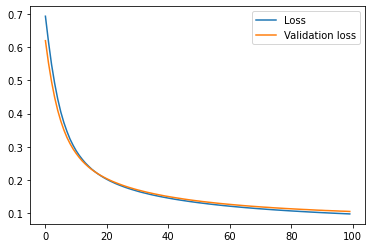

In [8]:
# Plot loss
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Validation loss')
plt.legend()

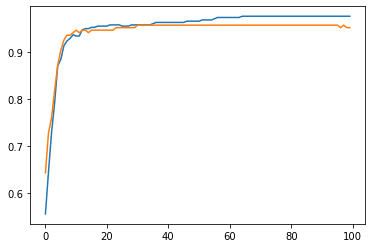

In [9]:
# Plot accuracy
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation accuracy')

In [10]:
print(f"Model accuracy with the test data: {model.evaluate(X_test, y_test)}")

6/6 [==============================] - 0s 2ms/step - loss: 0.1050 - accuracy: 0.9521
Model accuracy with the test data: [0.10498710721731186, 0.9521276354789734]
